# AMOCarray demo

The purpose of this notebook is to demonstrate the functionality of `AMOCarray`.

The demo is organised to show

- Step 1: Loading and plotting a sample dataset

- Step 2: Exploring the dataset attributes and variables.

Note that when you submit a pull request, you should `clear all outputs` from your python notebook for a cleaner merge.


In [1]:
import pathlib
import sys

script_dir = pathlib.Path().parent.absolute()
parent_dir = script_dir.parents[0]
sys.path.append(str(parent_dir))

import xarray as xr
import os
import pooch
from amocarray import readers, writers, plotters, tools, utilities


In [2]:
# Specify the path for writing datafiles
data_path = os.path.join(parent_dir, 'data')

In [3]:
# Load data from data/moc_transports
ds = readers.load_sample_dataset()
print(ds)

<xarray.Dataset> Size: 1MB
Dimensions:       (time: 13779)
Coordinates:
  * time          (time) datetime64[ns] 110kB 2004-04-02 ... 2023-02-11
Data variables:
    t_therm10     (time) float64 110kB ...
    t_aiw10       (time) float64 110kB ...
    t_ud10        (time) float64 110kB ...
    t_ld10        (time) float64 110kB ...
    t_bw10        (time) float64 110kB ...
    t_gs10        (time) float64 110kB ...
    t_ek10        (time) float64 110kB ...
    t_umo10       (time) float64 110kB ...
    moc_mar_hc10  (time) float64 110kB ...
Attributes:
    Title:                         RAPID MOC timeseries
    Institution:                   National Oceanography Centre,UK
    Website:                       http://www.rapid.ac.uk/
    Acknowledgement:               The RAPID-MOC monitoring project is funded...
    Created_by:                    Ben Moat
    Creation_date:                 17-Sep-2024
    Principle_investigator:        Ben Moat
    Principle_investigator_email:  ben.moat

In [4]:
plotters.show_contents(ds)

information is based on xarray Dataset


,dims,units,comment,standard_name,dtype
name,,,,,
moc_mar_hc10,time,Sv,,,float64
t_aiw10,time,Sv,,,float64
t_bw10,time,Sv,,,float64
t_ek10,time,Sv,,,float64
t_gs10,time,Sv,,,float64
t_ld10,time,Sv,,,float64
t_therm10,time,Sv,,,float64
t_ud10,time,Sv,,,float64
t_umo10,time,Sv,,,float64


/Users/eddifying/Cloudfree/gitlab-cloudfree/amocarray/venv/lib/python3.13/site-packages/xarray/groupers.py:490: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


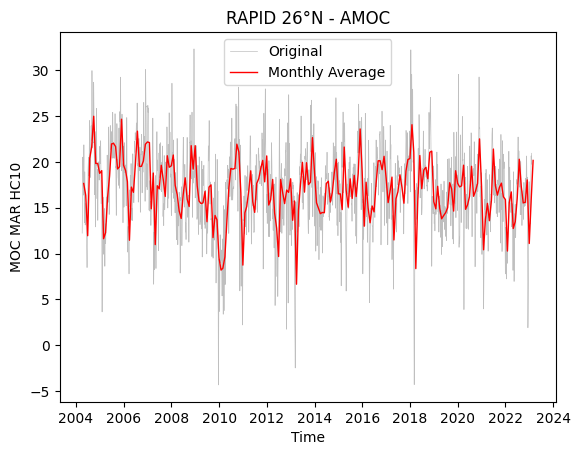

In [ ]:
import matplotlib.pyplot as plt

# Resample the dataset to monthly averages
ds_monthly = ds.resample(time='M').mean()

# Plot the original dataset in thin grey
ds['moc_mar_hc10'].plot(color='grey', alpha=0.5, linewidth=0.5, label='Original')

# Plot the monthly averaged dataset in thick red
ds_monthly['moc_mar_hc10'].plot(color='red', linewidth=1, label='Monthly Average')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
# Add title and labels
plt.title('RAPID 26°N - AMOC')
plt.xlabel('Time')
plt.ylabel('Transport [Sv]')
plt.legend()
plt.show()